# Data Science for Beginners by Microsoft
## Module 1: Introduction | Lesson 1: Defining Data Science
##### Task 1A: Modify the code presented in 'notebook.ipynb' to find out related concepts in the field of Big Data.
<br><br>

**Goal**

As mentioned in Task 1A, I am going to perform **text mining** for the field of Big Data. I will use the page on Big Data from Wikipedia.


In [2]:
# url is a tring variable that contains a web address
url = 'https://en.wikipedia.org/wiki/Big_data'

## Step 1: Getting the Data

In [6]:
# importing the requests library
import requests

text = requests.get(url).content.decode('utf-8')



1) .get(): the get functions is used to retrieve data from a specified url <br><br>
2) .content: It retrieves the content of the HTTP response, which includes the raw HTML or data returned by the server.<br><br>
3) .decode('utf-8'): The decode() method is used to convert the raw content (which is in bytes) to a string.
    The 'utf-8' argument specifies the character encoding used for the conversion.


In [7]:
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Big data - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-fea

## Step 2: Transforming the Data

In [8]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Big data - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Definition Toggle Definition subsection 1.1 Big data vs. business intelligence 2 Characteristics 3 Architecture 4 Technologies 5 Applications Toggle Applications subsection 5.1 Government 5.2 International development 5.2.1 Benefits 5.2.2 Challenges 5.3 Finance 5.4 Healthcare 5.5 Education 5.6 Media 5.7 Insurance 5.8 Internet of things (IoT) 5.9 Information technology 6 Case studies Toggle Case studies subsection 6.1 Government 6.1.1 China 6.1.2 India 6.1.3 Israel 6.1.4 United Kingdom 6.1.

## Step 3: Getting Insights

In [9]:
import sys
!{sys.executable} -m pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=ff3d280490cfed8590ea4519e76675be591d6a12f9dd1d5155bfecb34112e250
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


The main functionality is available from `Rake` object, which we can customize using some parameters. In my case, I will set the minimum length of a keyword to **5** characters, minimum frequency of a keyword in the document to **7**, and maximum number of words in a keyword - to **2**.

In [43]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=7,min_chars=5,)
res = extractor.apply(text)
print(res)
print('Length of res is: ', len(res))

[('big data', 4.0), ('machine learning', 4.0), ('wayback machine', 4.0), ('data collected', 3.769230769230769), ('international journal', 3.6842105263157894), ('information', 1.6585365853658536), ('challenges', 1.5625), ('science', 1.4761904761904763), ('technologies', 1.4615384615384615), ('analysis', 1.45), ('government', 1.4285714285714286), ('development', 1.4210526315789473), ('internet', 1.368421052631579), ('future', 1.3636363636363635), ('society', 1.3), ('volume', 1.2307692307692308), ('nature', 1.2), ('university', 1.125), ('variety', 1.0), ('update', 1.0), ('order', 1.0), ('bibcode', 1.0), ('archived', 1.0), ('original', 1.0), ('1016/j', 1.0), ('https', 1.0)]
Length of res is:  26


 the most relevant disciplines, such as machine learning and big data, are present in the list at top positions. But other words are not related and presented in the top words too , like 'wayback machine', such that it is mentioned in the references sections and its frequency is more than 15 .

## Step 4: Visualizing the Result

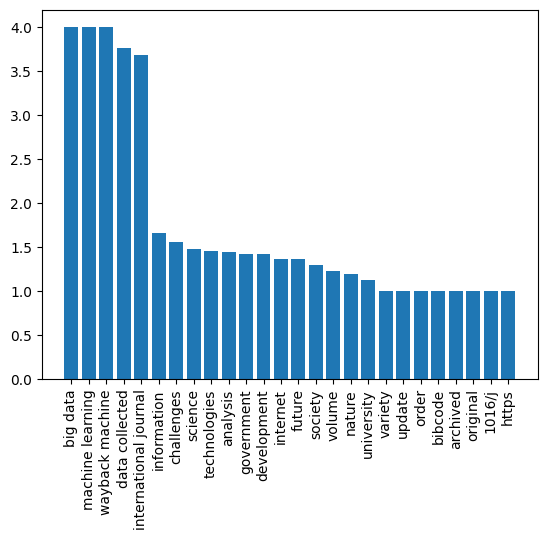

In [44]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [45]:
# Installing the worcloud library
!{sys.executable} -m pip install wordcloud

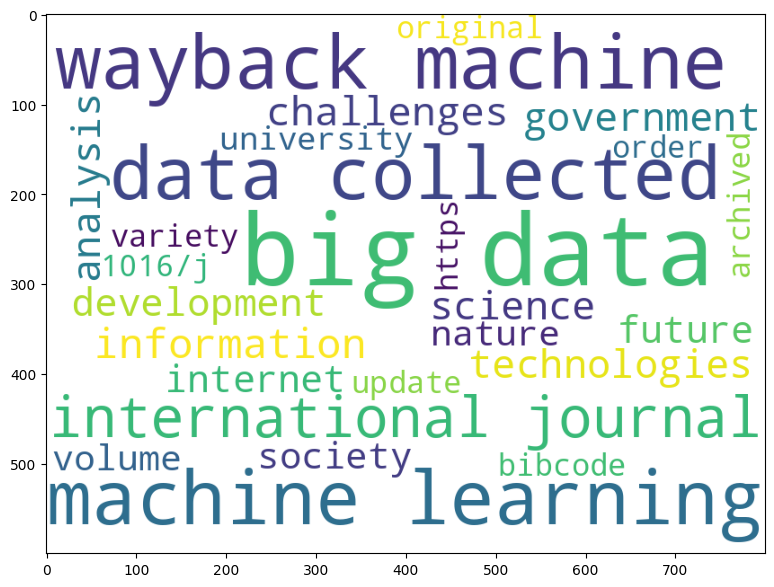

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

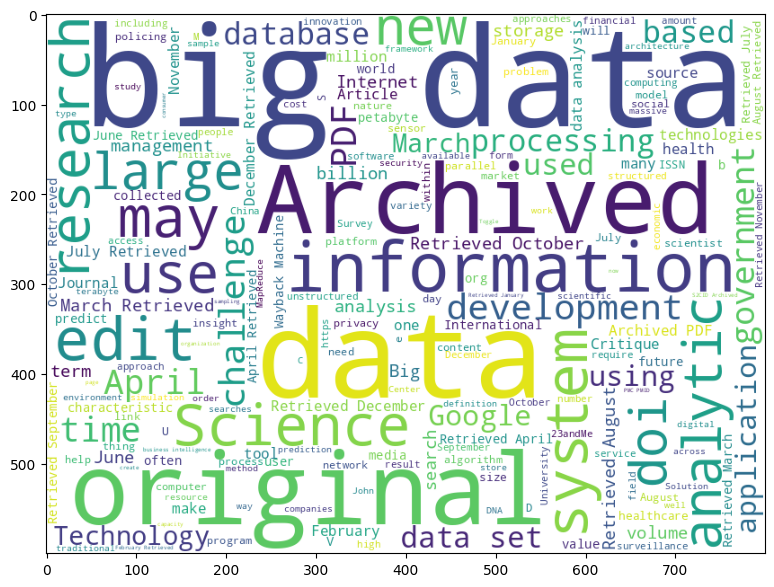

In [47]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))